In [53]:
import numpy as np

from scipy import signal
from scipy.fft import fft, fftshift

import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import gridspec

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits
from astropy.visualization.mpl_normalize import AsymmetricPercentileInterval
from astropy.visualization import astropy_mpl_style


import datetime

import sunpy.coordinates  # NOQA
import sunpy.map
import sunpy.data.sample
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.net.vso import VSOClient
from sunpy.visualization.animator import MapSequenceAnimator
from sunpy.map import Map
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.coordinates import Helioprojective, get_body_heliographic_stonyhurst
from sunpy.time import parse_time



import aiapy.data.sample as sample_data
from aiapy.calibrate import register, update_pointing



from PIL import Image

import warnings
warnings.filterwarnings("ignore")

In [79]:
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


In [ ]:
result = Fido.search(a.Time('2013-06-13T10:45:00', '2013-06-13T11:15:00'), 
                     a.Instrument("aia"), a.Wavelength(171*u.angstrom,171*u.Angstrom)
                    # a.vso.Sample(12*u.second)
)
result

# download = Fido.search(result)

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f9b8221cf10>
Results from 1 Provider:

150 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 10.168 Gbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2013-06-13 10:45:11.000 2013-06-13 10:45:12.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:45:23.000 2013-06-13 10:45:24.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:45:35.000 2013-06-13 10:45:36.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:45:47.000 2013-06-13 10:45:48.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:45:59.000 2013-06-13 10:46:00.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:46:11.000 2013-06-13 10:46:12.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:46:23.000 2013-06-13 10:46:24.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:46:35.000 2013-06-13 10:46:36.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:46:47.000 2013-06-13 10:46:48.000    SDO ...    FULLDISK 64.64844
2013-06-13 10:46:59.000 2013-06-13 10:47:00.000    SDO ...    FULLDISK 64.64844
                    ...                     ...    ... ...         ...      ...
2013-06-13 11:13:11.000 2013-06-13 11:13:12.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:13:23.000 2013-06-13 11:13:24.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:13:35.000 2013-06-13 11:13:36.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:13:47.000 2013-06-13 11:13:48.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:13:59.000 2013-06-13 11:14:00.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:14:11.000 2013-06-13 11:14:12.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:14:23.000 2013-06-13 11:14:24.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:14:35.000 2013-06-13 11:14:36.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:14:47.000 2013-06-13 11:14:48.000    SDO ...    FULLDISK 64.64844
2013-06-13 11:14:59.000 2013-06-13 11:15:00.000    SDO ...    FULLDISK 64.64844
Length = 150 rows

In [49]:
def Download(A):
    '''''
    A is the wavelength 
    '''''
    # Fido.registry.register_provider("vso", VSOClient())
    # giving range of time that flare occurs
    # time_range = a.Time('2013-06-13 09:20', '2013-06-13 09:55')
    time_range = a.Time('2013-06-13 10:45', '2013-06-13 11:15')

    # giving instrument and wavelength to get data in
    instrument = a.Instrument('AIA')
    #physobs = a.Physobs('LOS_magnetic_field') 
    wavelength = a.Wavelength(A * u.angstrom)
    provider = a.Provider.jsoc
    # getting data in given wavelength and time range
    result = Fido.search(time_range, instrument, wavelength)
    #result = Fido.search(time_range, instrument, physobs)
    

    # downloading data
    downloaded_files = Fido.fetch(result)
    return downloaded_files

In [84]:
Download(171)

Files Downloaded:   0%|          | 0/150 [01:54<?, ?file/s]

150/0 files failed to download. Please check `.errors` for details


[]
Errors:
(<parfive.results.Error object at 0x7f9b826607c0>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547 with error <ClientResponse(http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547) [500 Internal Server Error]>
<CIMultiDictProxy('Date': 'Mon, 16 Dec 2024 20:03:54 GMT', 'Server': 'Apache/2.2.15 (CentOS)', 'Content-Length': '624', 'Connection': 'close', 'Content-Type': 'text/html; charset=iso-8859-1')>
)(<parfive.results.Error object at 0x7f9b8125ac70>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195559-1150195559,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=

In [41]:
def Fits_to_maps(file):
    """
    file - string to location of wanted files
    """
    # Creating path to images of specified wavelength
    path = os.listdir(file)
    
    # Creating empty array to append processed maps
    maps = []

    # Looping over each image file in the directory and turning them into maps
    for img in path:
        img_path = os.path.join(file, img)
        
        # Loading the FITS file as a SunPy map
        aia_map = sunpy.map.Map(img_path)
        
        # # Check if aia_map is a list (indicating multiple HDUs) and select the first one
        # if isinstance(aia_map, list):
        #     aia_map = aia_map[0]  # Select the primary HDU if only one is needed
        
        maps.append(aia_map)
    
    return maps

In [42]:
def point_register(maps):
    aia_map_calibrate = []
    for i in maps:
        # aia_map_updated_pointing = update_pointing(i)
        aia_map_cal = register(i)
        aia_map_calibrate.append(aia_map_cal)
    return aia_map_calibrate

In [43]:
def submaps(maps):

    submaps = []
    for i in maps :
        bottom_left = SkyCoord(340 * u.arcsec, -275 * u.arcsec, frame=i.coordinate_frame)
        top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)   
        submap = i.submap(bottom_left=bottom_left, top_right=top_right)
        submaps.append(submap)

    return submaps

In [44]:
def d_rot(maps):
    map = []
    for i in maps:

        maps_cal = sunpy.physics.differential_rotation.differential_rotate(i,time = maps[0].date)


        maps_cal.save(f'fully_calibrated_FD_304_fixingtime/FD_304_{i.date}.fits', filetype='fits')

    return map

In [45]:
mapss_94 = Fits_to_maps('AIA_June_2013_304')

In [46]:
maps_94_point = point_register(mapss_94)

In [47]:
maps_94_point_rot = d_rot(maps_94_point)

In [51]:
Download(171)

Files Downloaded:   0%|          | 0/150 [02:29<?, ?file/s]

150/0 files failed to download. Please check `.errors` for details


[]
Errors:
(<parfive.results.Error object at 0x7f9b811e08b0>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547 with error <ClientResponse(http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195547-1150195547) [500 Internal Server Error]>
<CIMultiDictProxy('Date': 'Thu, 12 Dec 2024 13:48:12 GMT', 'Server': 'Apache/2.2.15 (CentOS)', 'Content-Length': '624', 'Connection': 'close', 'Content-Type': 'text/html; charset=iso-8859-1')>
)(<parfive.results.Error object at 0x7f9b811f9900>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1150195559-1150195559,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=

In [11]:
maps_94_point = point_register(maps_94)

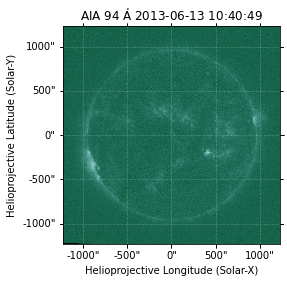

In [15]:
maps_94_point[401].plot()

In [16]:
maps_94_rot = d_rot(maps_94_point)

In [18]:
maps_1700 = Fits_to_maps('AIA_June_2013_1700')


In [16]:
print(maps_1700[10].date)

2013-06-13T10:20:30.710


# trying to do regestered full disk images and drot full disk images

In [19]:
maps_1700 = sorted(maps_1700,key = lambda m:m.date)
registered_1700 = point_register(maps_1700)

In [21]:
rot_registered_sub1700 = d_rot(registered_1700)

In [12]:
submaps_registered_rot_1700 = submaps(rot_registered_sub1700)

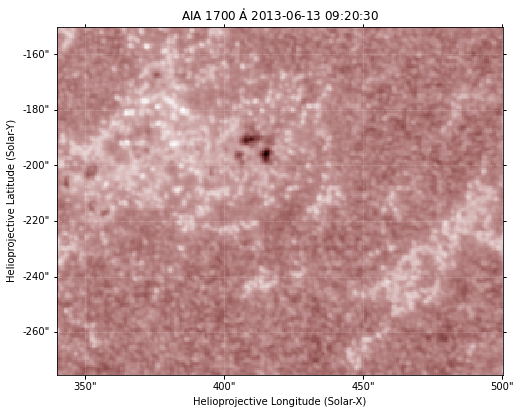

MovieWriter imagemagick unavailable; using Pillow instead.


In [21]:
#attempting to get an animation using funcanimation function
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_registered_rot_1700[0].wcs})

im = submaps_registered_rot_1700[0].plot(cmap = 'sdoaia1700',axes=ax)

def update(i):
    ax.images[0].set_array(submaps_registered_rot_1700[i].data)  
    ax.set_title(f"Frame {i + 1}") 
    ax.grid(color='yellow', linestyle='--', linewidth=1.5)  


anim = FuncAnimation(fig, update, frames=len(submaps_registered_rot_1700), interval=200, repeat=True)
plt.show()

anim.save('solar_flare_animation__1700_4_12_24_gridlines.gif', writer='imagemagick')



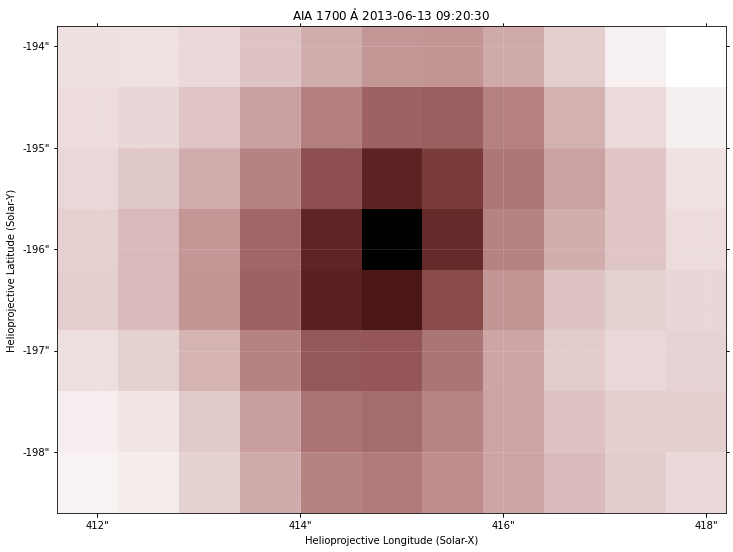

In [34]:
sunspot_1700 = []
for i in submaps_registered_rot_1700 :
    bottom_left = SkyCoord(412* u.arcsec, -198 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(418 * u.arcsec, -194 * u.arcsec, frame=i.coordinate_frame)    
    submap = i.submap(bottom_left=bottom_left, top_right=top_right)
    sunspot_1700.append(submap)

bottom_left = SkyCoord(412* u.arcsec, -198 * u.arcsec, frame=submaps_registered_rot_1700[0].coordinate_frame)
top_right = SkyCoord(418 * u.arcsec, -194 * u.arcsec, frame=submaps_registered_rot_1700[0].coordinate_frame)   
submap = submaps_registered_rot_1700[0].submap(bottom_left=bottom_left, top_right=top_right)


plt.figure(figsize=(12,12))
submap.plot()

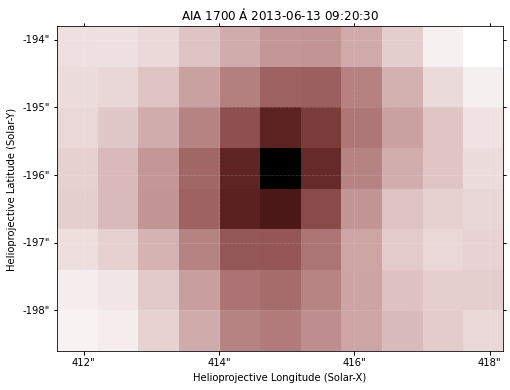

MovieWriter imagemagick unavailable; using Pillow instead.


In [36]:
#attempting to get an animation using funcanimation function
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': sunspot_1700[0].wcs})

im = sunspot_1700[0].plot(cmap = 'sdoaia1700',axes=ax)

def update(i):
    ax.images[0].set_array(sunspot_1700[i].data)  
    ax.set_title(f"Frame {i + 1}") 
    # ax.grid(color='yellow', linestyle='--', linewidth=1.5)  


anim = FuncAnimation(fig, update, frames=len(sunspot_1700), interval=200, repeat=True)
plt.show()

anim.save('sunspot_animation__1700_4_12_24.gif', writer='imagemagick')

In [37]:
for i,aia_map in enumerate(rot_registered_sub1700):
    aia_map.save(f'fully_calibrated_FD_1700/FD_1700_{i}.fits', filetype='fits')

In [41]:
maps_1700 = Fits_to_maps('fully_calibrated_FD_1700')


# 171 d_rot

In [22]:
maps_171 = Fits_to_maps('AIA_June_2013_171')

In [23]:
len(maps_171)

401

In [25]:
maps_171_point = point_register(maps_171)

In [28]:
maps_171_rot = d_rot(maps_171_point)

In [30]:
maps_171 = Fits_to_maps('fully_calibrated_FD_171_fixingtime')
len(maps_171)

401

In [31]:
submaps_171 = submaps(maps_171)

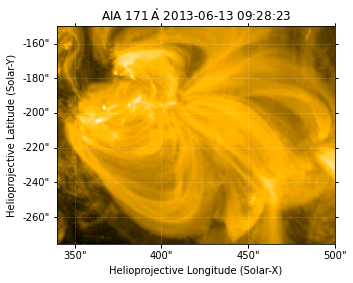

In [32]:
submaps_171[0].plot()

In [121]:
map_1005 = Fits_to_maps('1005am_onwards_171')

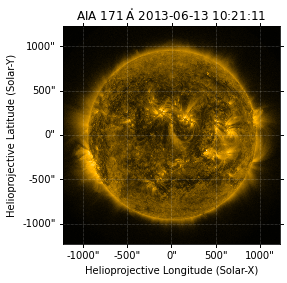

In [126]:
plt.figure()
map_1005[5].plot()
plt.show()

In [127]:
maps_1005_pr = point_register(map_1005)

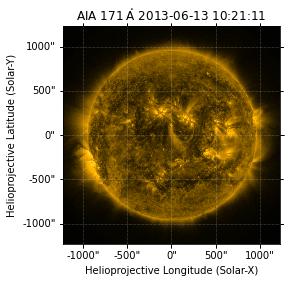

In [128]:
plt.figure()
maps_1005_pr[5].plot()
plt.show()

In [132]:
submaps_1005 = submaps(maps_1005_pr)

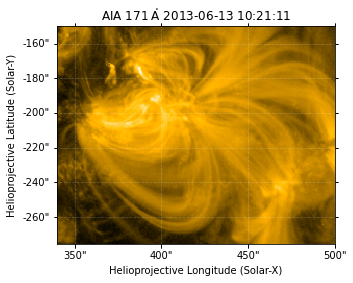

In [133]:
plt.figure()
submaps_1005[5].plot()
plt.show()

In [134]:
submaps_1005_rot = d_rot(submaps_1005)

In [138]:
numbers = [str(i) for i in range(236, 261)]
print(numbers)
for i, aia_map in zip(numbers,submaps_1005_rot):
    aia_map.save(f'AIA_171_prep_rot/aia_map_{i}.fits', filetype='fits')

['236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260']


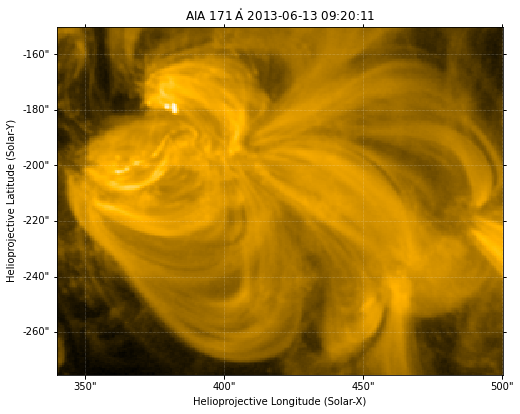

MovieWriter imagemagick unavailable; using Pillow instead.


In [141]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_171_prepped_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_171_prepped_rot[0].plot(cmap = 'sdoaia171',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_171_prepped_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_171_prepped_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_171_check.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

# trying to prep and rotate the 94 wavelength band

In [149]:
maps_94 = Fits_to_maps('AIA_June_2013_94/')

print(maps_94[0])

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 94.0 Angstrom
Wavelength:		 94.0 Angstrom
Observation Date:	 2013-06-13 09:28:25
Exposure Time:		 2.90207 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600109 0.600109] arcsec / pix
Reference Pixel:	 [2057.909912 2041.52002 ] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 0,  0,  0, ...,  0, -1, -1],
       [-1,  0,  0, ..., -1,  1, -1],
       [ 0, -1,  0, ...,  0, -1, -1],
       ...,
       [-2,  1,  1, ...,  1, -1, -2],
       [-1,  0, -1, ...,  0, -1,  0],
       [-2, -1,  0, ...,  2, -2,  0]], dtype=int16)


In [160]:
maps_94_pr = point_register(maps_94)

In [170]:
maps_94_pr = sorted(maps_94_pr,key = lambda m:m.date)


In [171]:
submaps_94_pr = submaps(maps_94_pr)

In [174]:
submaps_94_pr_rot = d_rot(submaps_94_pr)

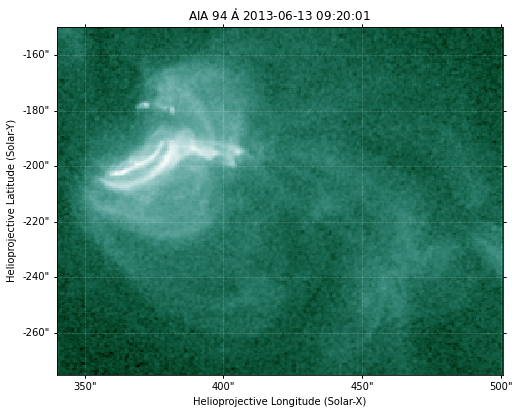

MovieWriter imagemagick unavailable; using Pillow instead.


In [175]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_94_pr_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_94_pr_rot[0].plot(cmap = 'sdoaia94',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_94_pr_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_94_pr_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_94_check.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

In [177]:
for i, aia_map in enumerate(submaps_94_pr_rot):
    aia_map.save(f'AIA_94_prep_rot/aia_map_{i}.fits', filetype='fits')

# trying to prep and rotate 304 waveband

In [178]:
maps_304 = Fits_to_maps('AIA_June_2013_304')

In [179]:
maps_304 = sorted(maps_304,key = lambda m:m.date)


In [180]:
maps_304_pr = point_register(maps_304)

In [188]:
submaps_304_pr = submaps(maps_304_pr)

In [189]:
submaps_304_pr_rot = d_rot(submaps_304_pr)

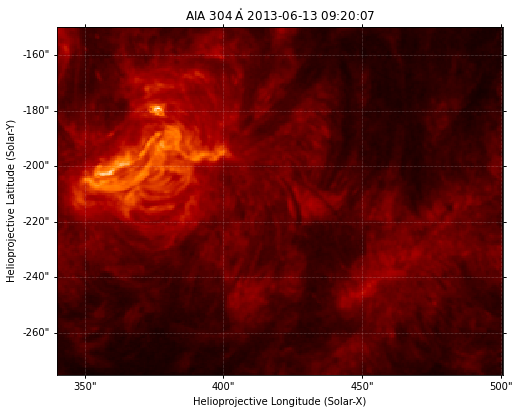

MovieWriter imagemagick unavailable; using Pillow instead.


In [190]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_304_pr_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_304_pr_rot[0].plot(cmap = 'sdoaia304',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_304_pr_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_304_pr_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_304_check.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

# going to do all of 171 and 1700 again 

In [6]:
Download(171)

Files Downloaded:   0%|          | 0/5 [00:00<?, ?file/s]




















































































































































































































































































































































Files Downloaded:  20%|██        | 1/5 [00:31<02:04, 31.05s/file]

















































































































































































































































Files Downloaded:  40%|████      | 2/5 [00:34<00:44, 14.89s/file]



























































Files Downloaded:  60%|██████    | 3/5 [00:35<00:16,  8.47s/file]










































































































['/Users/maxrobertson/sunpy/data/aia_lev1_171a_2013_06_13t10_05_11_34z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_171a_2013_06_13t10_05_23_34z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_171a_2013_06_13t10_05_35_35z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_171a_2013_06_13t10_05_47_34z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_171a_2013_06_13t10_05_59_34z_image_lev1.fits']

In [7]:
maps_1700 = Fits_to_maps('AIA_June_2013_1700/')

In [8]:
maps_1700 = sorted(maps_1700,key = lambda m:m.date)


In [ ]:
maps_1700_pr = point_register(maps_1700)

In [16]:
submaps_1700_pr = submaps(maps_1700_pr)

In [17]:
submaps_1700_pr_rot = d_rot(submaps_1700_pr)

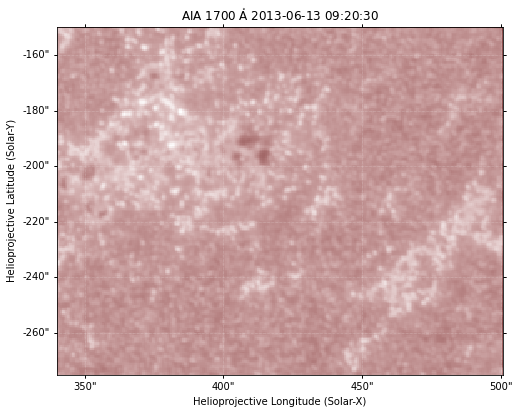

MovieWriter imagemagick unavailable; using Pillow instead.


In [18]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_1700_pr_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_1700_pr_rot[0].plot(cmap = 'sdoaia1700',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_1700_pr_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_1700_pr_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_1700_check.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

In [19]:
for i, aia_map in enumerate(submaps_1700_pr_rot):
    aia_map.save(f'AIA_1700_prep_rot/aia_map_{i}.fits', filetype='fits')

In [7]:
maps_171 = Fits_to_maps('AIA_June_2013_171')

In [8]:
maps_171 = sorted(maps_171,key = lambda m:m.date)

In [9]:
maps_171_pr = point_register(maps_171)

In [10]:
submaps_171_pr = submaps(maps_171_pr)

In [11]:
submaps_171_pr_rot = d_rot(submaps_171_pr)

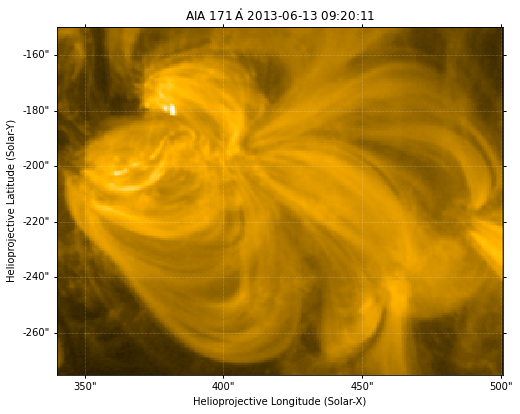

MovieWriter imagemagick unavailable; using Pillow instead.


In [12]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_171_pr_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_171_pr_rot[0].plot(cmap = 'sdoaia171',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_171_pr_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_171_pr_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_171_check_3.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

In [13]:
for i, aia_map in enumerate(submaps_171_pr_rot):
    aia_map.save(f'AIA_171_prep_rot/aia_map_{i}.fits', filetype='fits')

# getting the 1600 A band

In [5]:
Download(1600)

Files Downloaded:   0%|          | 0/3 [00:02<?, ?file/s]

3/0 files failed to download. Please check `.errors` for details


[]
Errors:
(<parfive.results.Error object at 0x7fcfe4573b80>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=1600_1150193141-1150193141,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=1600_1150193141-1150193141 with error <ClientResponse(http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=1600_1150193141-1150193141) [500 Internal Server Error]>
<CIMultiDictProxy('Date': 'Wed, 27 Nov 2024 19:57:52 GMT', 'Server': 'Apache/2.2.15 (CentOS)', 'Content-Length': '624', 'Connection': 'close', 'Content-Type': 'text/html; charset=iso-8859-1')>
)(<parfive.results.Error object at 0x7fcfe4573810>
http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=1600_1150193165-1150193165,
Download Failed: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compr

In [ ]:
map_171 = Fits_to_maps('AIA_June_2013_171')

In [5]:
map_1700 = Fits_to_maps('AIA_June_2013_1700')

In [6]:
map_94 = Fits_to_maps('AIA_June_2013_94')

In [7]:
map_304 = Fits_to_maps('AIA_June_2013_304')

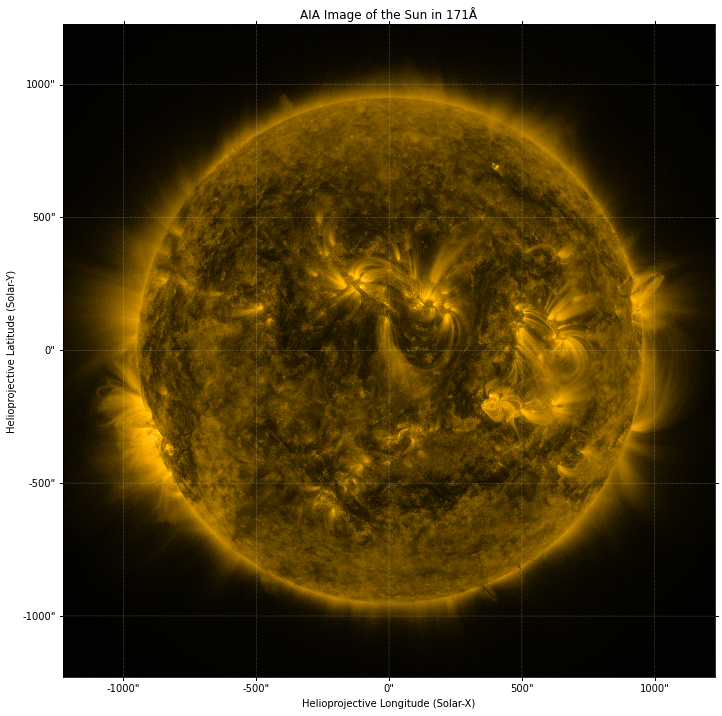

In [4]:
plt.figure(figsize = (12,12))
map_171[0].plot()
plt.title('AIA Image of the Sun in 171Å')

plt.savefig(fname = '171Image',format="jpeg", bbox_inches="tight")
plt.show()

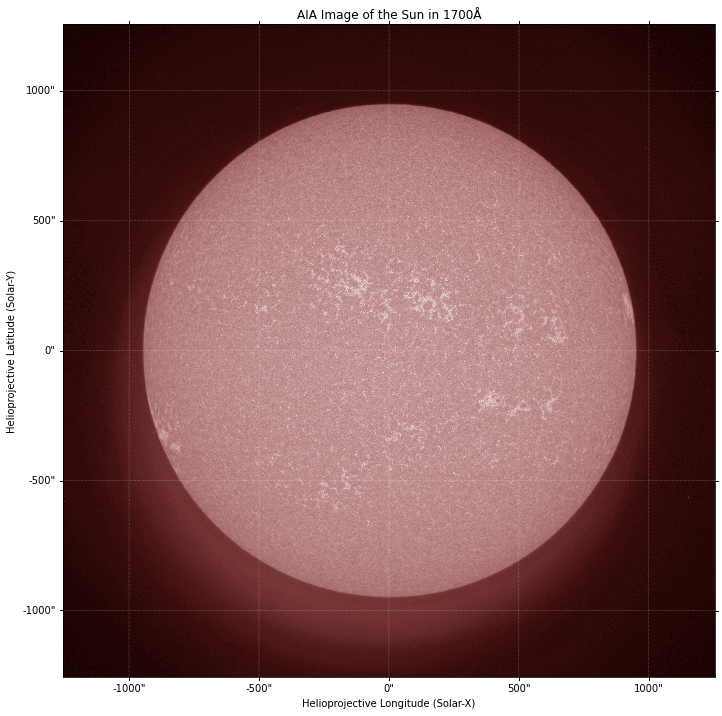

In [9]:
plt.figure(figsize = (12,12))
map_1700[0].plot()
plt.title('AIA Image of the Sun in 1700Å')

plt.savefig(fname = '1700Image',format="jpeg", bbox_inches="tight")
plt.show()

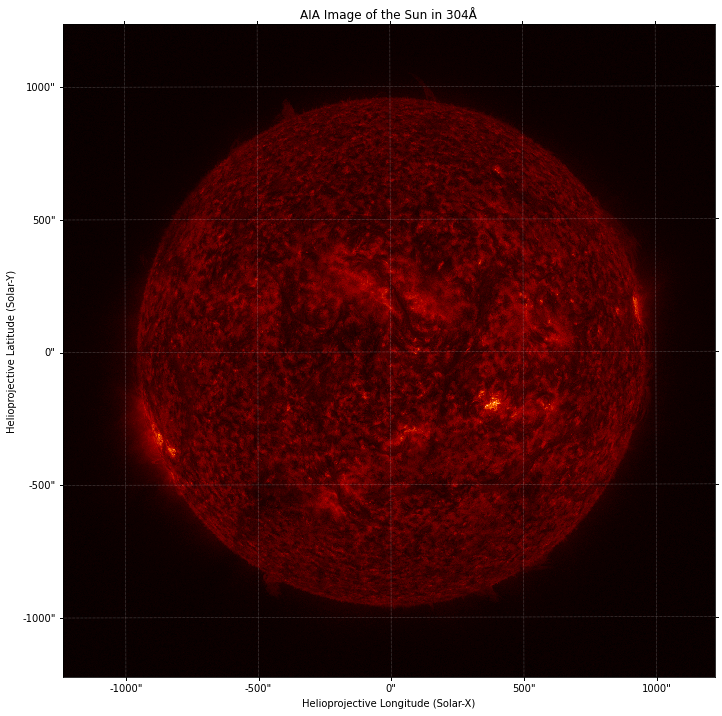

In [10]:
plt.figure(figsize = (12,12))
map_304[0].plot()
plt.title('AIA Image of the Sun in 304Å')

plt.savefig(fname = '304Image',format="jpeg", bbox_inches="tight")
plt.show()

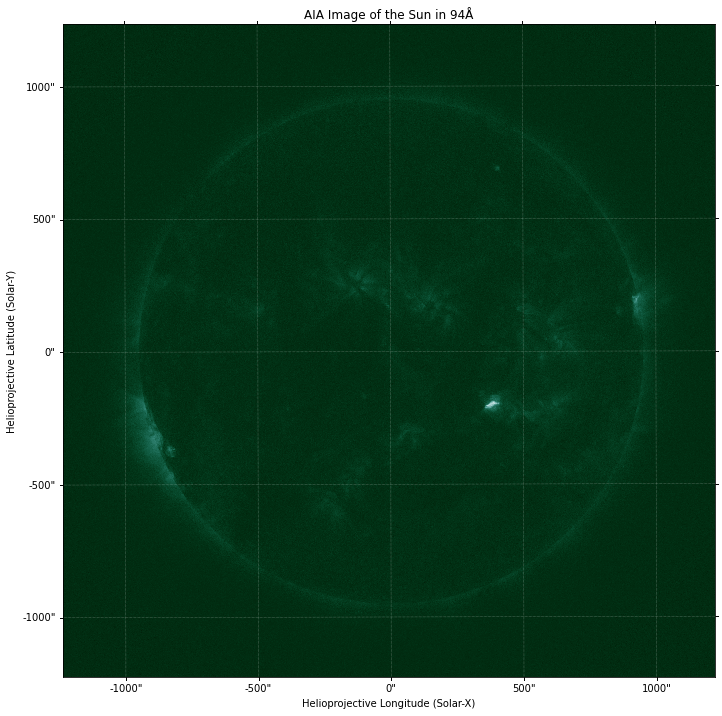

In [11]:
plt.figure(figsize = (12,12))
map_94[0].plot()
plt.title('AIA Image of the Sun in 94Å')

plt.savefig(fname = '94Image',format="jpeg", bbox_inches="tight")
plt.show()

In [5]:
maps_flare_94 = Fits_to_maps('AIA_94_prep_rot_done')
maps_flare_171 = Fits_to_maps('AIA_171_prep_rot_done')
maps_flare_304 = Fits_to_maps('AIA_304_prep_rot_done')
maps_flare_1700 = Fits_to_maps('AIA_1700_prep_rot_done')

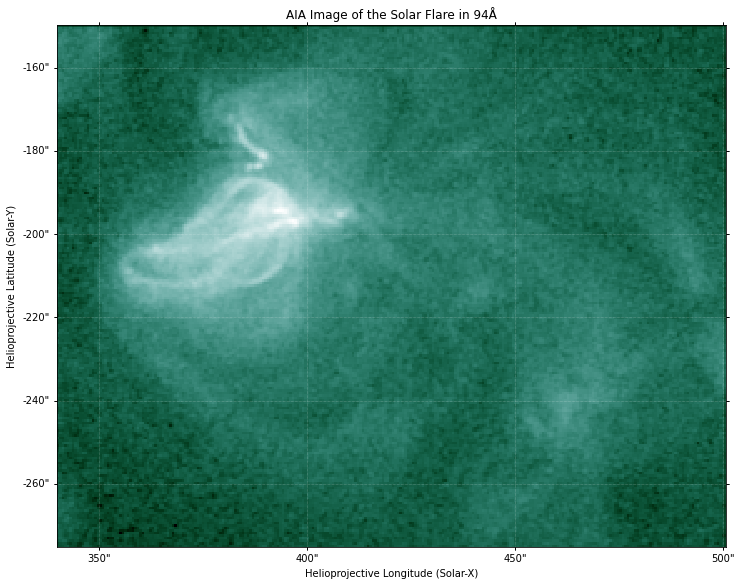

In [ ]:
plt.figure(figsize = (12,12))
maps_flare_94[0].plot()
plt.title('AIA Image of the Solar Flare in 94Å')

plt.savefig(fname = '94Image_flare.jpeg',format="jpeg", bbox_inches="tight")
plt.show()

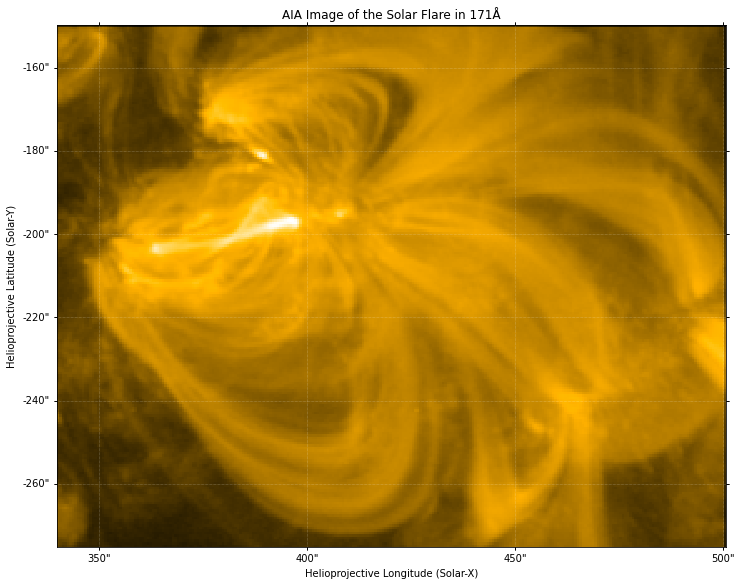

In [10]:
plt.figure(figsize = (12,12))
maps_flare_171[0].plot()
plt.title('AIA Image of the Solar Flare in 171Å')

plt.savefig(fname = '171Image_flare.jpeg',format="jpeg", bbox_inches="tight")
plt.show()

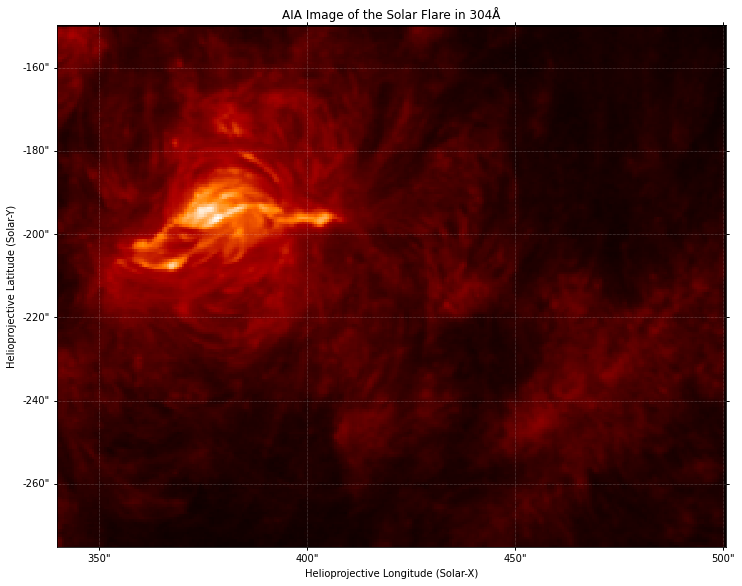

In [11]:
plt.figure(figsize = (12,12))
maps_flare_304[0].plot()
plt.title('AIA Image of the Solar Flare in 304Å')

plt.savefig(fname = '304Image_flare.jpeg',format="jpeg", bbox_inches="tight")
plt.show()

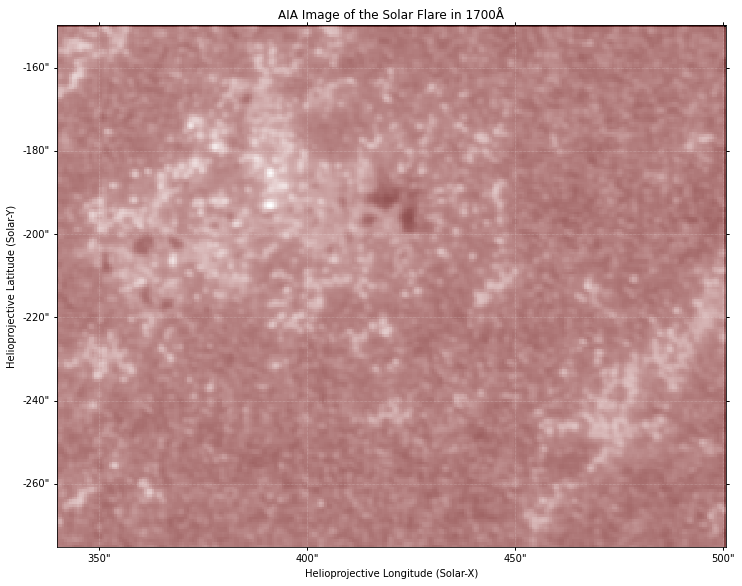

In [12]:
plt.figure(figsize = (12,12))
maps_flare_1700[0].plot()
plt.title('AIA Image of the Solar Flare in 1700Å')
plt.savefig(fname = '1700Image_flare.jpeg',format="jpeg", bbox_inches="tight")
plt.show()